# Take a grayscale image and add salt and pepper noise. Write programs for the following operations and observe their outputs

a. Linear smoothing or Image averaging

b. Weighted averaging

c. Median filtering. Compare the output quality of image
averaging and median filtering.

d. Max filtering

e. Min filtering

In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

#Uploading Image

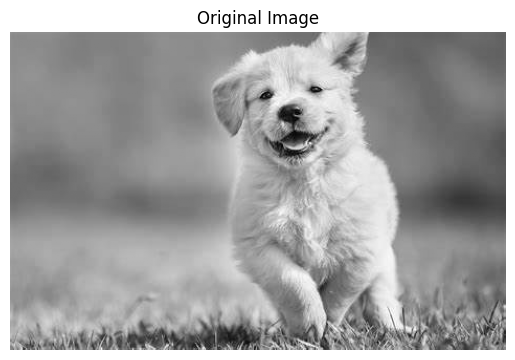

In [52]:
image = cv2.imread('gray_image.jpg', cv2.IMREAD_GRAYSCALE)
plt.figure()
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

# Adding salt and Papper Noise

In [53]:
def add_salt_pepper_noise(image, salt_prob, pepper_prob):
    noisy_img = np.copy(image)
    total_pixels = image.size

    num_salt = int(total_pixels * salt_prob)
    num_pepper = int(total_pixels * pepper_prob)

    # Add salt (white pixels)
    salt_coords = [np.random.randint(0, i - 1, num_salt) for i in image.shape]
    noisy_img[salt_coords[0], salt_coords[1]] = 255

    # Add pepper (black pixels)
    pepper_coords = [np.random.randint(0, i - 1, num_pepper) for i in image.shape]
    noisy_img[pepper_coords[0], pepper_coords[1]] = 0

    return noisy_img

# Displaying Noisy Image

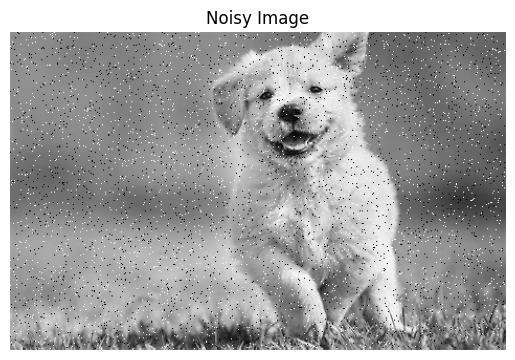

In [54]:
noisy_image = add_salt_pepper_noise(image, 0.02, 0.02)
plt.figure()
plt.imshow(noisy_image, cmap='gray')
plt.title("Noisy Image")
plt.axis('off')
plt.show()

# Linear Smoothing

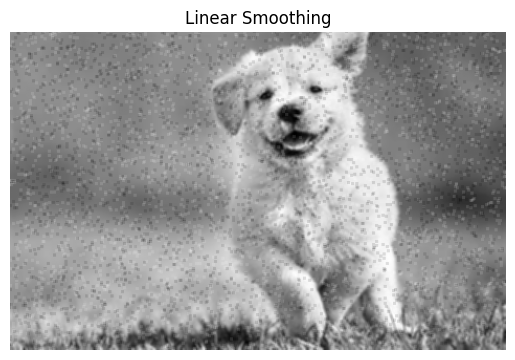

In [55]:
def apply_filter(image, kernel):
    return cv2.filter2D(image, -1, kernel)
avg_kernel = np.ones((3, 3), np.float32) / 9
avg_filtered = apply_filter(noisy_image, avg_kernel)
plt.figure()
plt.imshow(avg_filtered, cmap='gray')
plt.title("Linear Smoothing")
plt.axis('off')
plt.show()

# Weighted Averaging

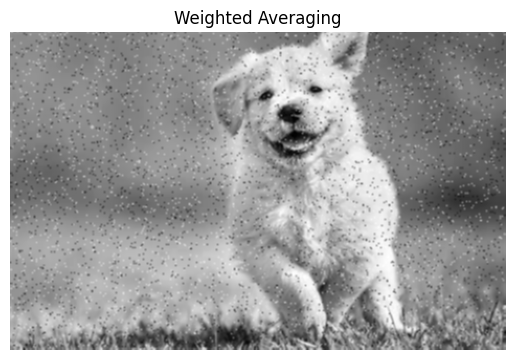

In [41]:
weighted_kernel = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16
weighted_filtered = apply_filter(noisy_image, weighted_kernel)
plt.figure()
plt.imshow(weighted_filtered, cmap='gray')
plt.title("Weighted Averaging")
plt.axis('off')
plt.show()

# Median Filtering

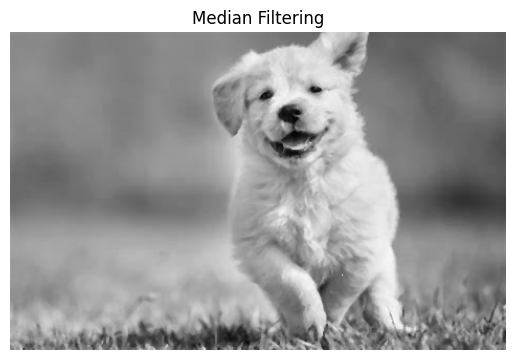

In [42]:
def median_filter(image, ksize):
    return cv2.medianBlur(image, ksize)
median_filtered = median_filter(noisy_image, 3)
plt.figure()
plt.imshow(median_filtered, cmap='gray')
plt.title("Median Filtering")
plt.axis('off')
plt.show()

# Max Filtering

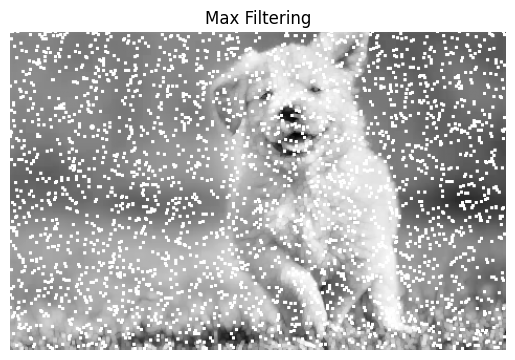

In [43]:
def max_filter(image, ksize):
    return cv2.dilate(image, np.ones((ksize, ksize), np.uint8))
max_filtered = max_filter(noisy_image, 3)
plt.figure()
plt.imshow(max_filtered, cmap='gray')
plt.title("Max Filtering")
plt.axis('off')
plt.show()

# Min Filtering

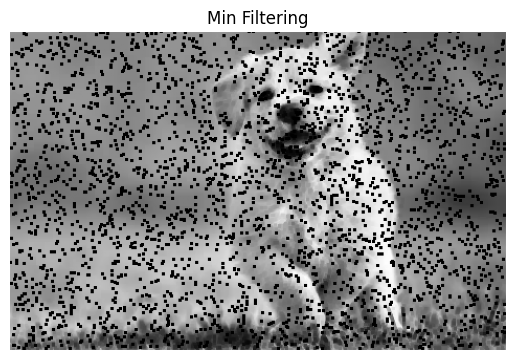

In [44]:
def min_filter(image, ksize):
    return cv2.erode(image, np.ones((ksize, ksize), np.uint8))
min_filtered = min_filter(noisy_image, 3)
plt.figure()
plt.imshow(min_filtered, cmap='gray')
plt.title("Min Filtering")
plt.axis('off')
plt.show()

# Compare Between Linear and Median Filtering

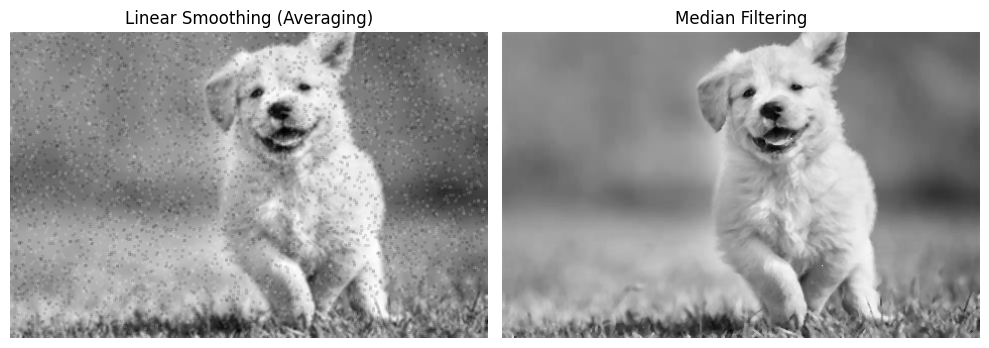

In [46]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(avg_filtered, cmap='gray')
plt.title("Linear Smoothing (Averaging)")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(median_filtered, cmap='gray')
plt.title("Median Filtering")
plt.axis('off')
plt.tight_layout()
plt.show()